# Trabalho de Mineração de Dados
Alunos:
- Felipe Martins
- Caio Righetto

### Processamento dos dados

In [69]:
#fazendo os imports necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_raw = pd.read_csv("..\data\smoking_driking_dataset_Ver01.csv")

In [3]:
df_raw.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df_raw['sex'].value_counts()

sex
Male      526415
Female    464931
Name: count, dtype: int64

In [6]:
mediaAlturaM = df_raw[df_raw['sex'] == 'Male']['height'].mean()

mediaAlturaM

168.54611855665206

In [7]:
mediaAlturaF = df_raw[df_raw['sex'] == 'Female']['height'].mean()

mediaAlturaF

155.10127309213624

<Axes: >

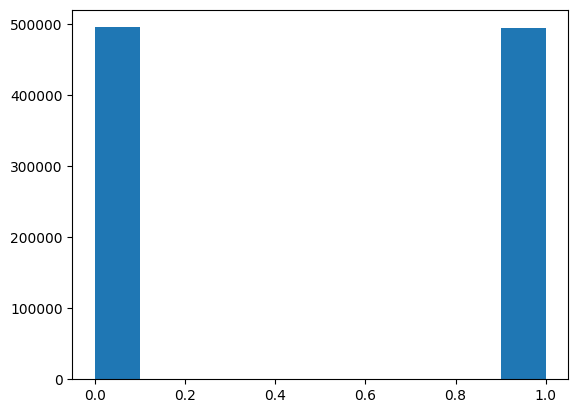

In [78]:
df_raw['DRK_YN'].hist(grid=False)

NameError: name 'data' is not defined

In [9]:
#vamos normalizar a coluna sexo, fazendo com que Male = 1 e Female = 0
df_normalized = df_raw

df_normalized['sex'] = df_normalized['sex'].map({'Male': 1, 'Female': 0})

In [10]:
#vamos normalizar a coluna DRK_YN, fazendo com que Y = 1 e N = 0
df_normalized['DRK_YN'] = df_normalized['DRK_YN'].map({'Y': 1, 'N': 0})

In [61]:
#vamos normalizar tambem a coluna SMK_stat_type_cd, fazendo com que 1 vire 0 e 2 e 3 virem 1
df_normalized['SMK_stat_type_cd'] = df_normalized['SMK_stat_type_cd'].map({1: 0, 2: 1, 3:1})

In [62]:
df_normalized.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0


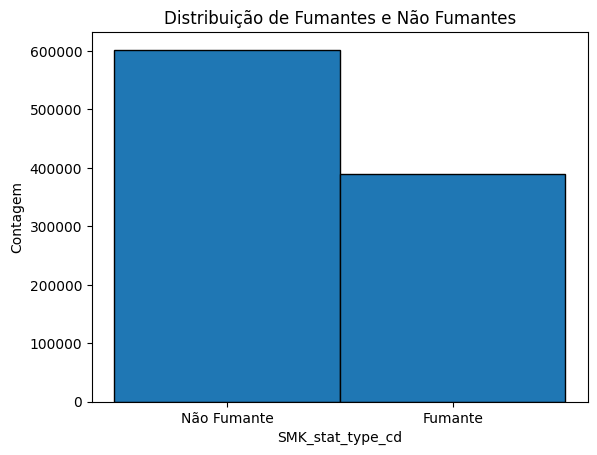

In [92]:
# Criar um histograma
plt.hist(df_normalized['SMK_stat_type_cd'], bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')

# Adicionar rótulos e título
plt.xlabel('SMK_stat_type_cd')
plt.ylabel('Contagem')
plt.title('Distribuição de Fumantes e Não Fumantes')

# Adicionar rótulos aos bins
plt.xticks([0, 1], ['Não Fumante', 'Fumante'])

# Exibir o histograma
plt.show()

### Modelagem Apriori

In [53]:
import apyori

In [54]:
celulas_preenchidas = df_normalized.notna().apply(sum, axis=1)

celulas_preenchidas

0         24
1         24
2         24
3         24
4         24
          ..
991341    24
991342    24
991343    24
991344    24
991345    24
Length: 991346, dtype: int64

In [59]:
registros = [set(linha.dropna()) for _, linha in df_normalized[celulas_preenchidas > 1].iterrows()]
registros[:5]
minsup = 0.04
minconf = 0.3

regras_associacao = apyori.apriori(registros, min_support=minsup, min_confidence=minconf)


for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'
      f' Confianca: {regra.ordered_statistics[0].confidence:.3f}'
  )


[] --> [0.0] Suporte: 0.643 Confianca: 0.643
[] --> [0.8] Suporte: 0.336 Confianca: 0.336
[] --> [0.9] Suporte: 0.334 Confianca: 0.334
[] --> [1.0] Suporte: 1.000 Confianca: 1.000
[] --> [1.2] Suporte: 0.323 Confianca: 0.323
[] --> [60.0] Suporte: 0.305 Confianca: 0.305
[] --> [70.0] Suporte: 0.308 Confianca: 0.308
[0.0] --> [0.4] Suporte: 0.048 Confianca: 0.788
[0.0] --> [0.5] Suporte: 0.102 Confianca: 0.813
[0.0] --> [0.6] Suporte: 0.163 Confianca: 0.837
[0.0] --> [0.7] Suporte: 0.222 Confianca: 0.346
[0.0] --> [0.8] Suporte: 0.230 Confianca: 0.358
[0.0] --> [0.9] Suporte: 0.199 Confianca: 0.310
[0.0] --> [1.0] Suporte: 0.643 Confianca: 0.643
[0.0] --> [1.2] Suporte: 0.180 Confianca: 0.559
[0.0] --> [1.5] Suporte: 0.093 Confianca: 0.522
[0.0] --> [2.0] Suporte: 0.111 Confianca: 0.452
[0.0] --> [3.0] Suporte: 0.073 Confianca: 0.318
[0.0] --> [10.0] Suporte: 0.052 Confianca: 0.906
[0.0] --> [11.0] Suporte: 0.062 Confianca: 0.887
[0.0] --> [12.0] Suporte: 0.077 Confianca: 0.871
[0.0] --

### Modelagem Regressão Logística

In [15]:
#fazendo os imports necessarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#definindo as variavels alvo
y = df_normalized['DRK_YN']
x = df_normalized.drop('DRK_YN',axis=1)

#separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)


In [16]:
modelo_LR = LogisticRegression()
modelo_LR.fit(X_train,y_train)
y_pred = modelo_LR.predict(X_test)


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#printando os scores obtidos
print("Pontuacao obtida com X e Y de treino: ", modelo_LR.score(X_train,y_train))
print("Pontuacao obtida com X e Y de teste: ", modelo_LR.score(X_test,y_test))
print("Pontuacao obtida com Y da previsão e o Y real: " , accuracy_score(y_test,y_pred))

Pontuacao obtida com X e Y de treino:  0.7153728015978292
Pontuacao obtida com X e Y de teste:  0.7143743380239068
Pontuacao obtida com Y da previsão e o Y real:  0.7143743380239068


In [18]:
#printando a importancia das features
coeficients = modelo_LR.coef_[0]
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coeficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
22,SMK_stat_type_cd,0.386025
16,hemoglobin,0.266964
0,sex,0.244508
3,weight,0.038258
13,HDL_chole,0.020269
18,serum_creatinine,0.020024
21,gamma_GTP,0.015321
19,SGOT_AST,0.008410
9,SBP,0.001574
15,triglyceride,0.001096


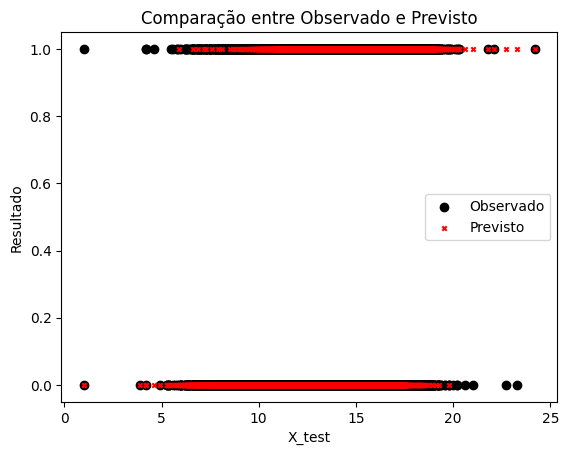

In [52]:
plt.scatter(X_test['hemoglobin'], y_test, color='black', label='Observado')
plt.scatter(X_test['hemoglobin'], y_pred, color='red', marker='x', label='Previsto',s=10)
plt.xlabel('X_test')
plt.ylabel('Resultado')
plt.legend()
plt.title('Comparação entre Observado e Previsto')
plt.show()

### Modelagem Random Forest

In [66]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df_normalized.drop('SMK_stat_type_cd', axis=1)
y = df_normalized['SMK_stat_type_cd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Treinamento do Modelo
# Inicializar e ajustar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Avaliação do Modelo
# Fazer previsões e avaliar o desempenho
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8131083875523276
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84    120582
           1       0.72      0.86      0.78     77688

    accuracy                           0.81    198270
   macro avg       0.81      0.82      0.81    198270
weighted avg       0.83      0.81      0.82    198270



In [75]:
# Criar um DataFrame com as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': features[indices],
    'Importance': feature_importances[indices]
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


feature_importance_df



,Feature,Importance
22,sex,0.168672
21,height,0.097148
20,hemoglobin,0.096100
19,gamma_GTP,0.057466
18,triglyceride,0.046475
17,waistline,0.045518
16,serum_creatinine,0.040893
15,LDL_chole,0.039009
14,tot_chole,0.038694
13,weight,0.038554
